In [58]:
import pandas as pd
col_names = ["country","year","sex","age","suicides_no","population","suicides/100k pop","country-year","HDI for year", "gdp_for_year ($)","gdp_per_capita ($)","generation"]
pima = pd.read_csv('master.csv', header=None, names=col_names)
pima = pima[1:]



In [4]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [5]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
def f1(p,r):

    return 2*(p*r)/(p+r)

In [7]:
def print_metrics(y_t,y_p,table,t,u):
    a,b,c,d =  metrics.accuracy_score(y_t, y_p),metrics.precision_score(y_t, y_p),metrics.recall_score(y_t, y_p),round(cls.score(x_train, y_train) * 100, 2)
    print(metrics.confusion_matrix(y_t, y_p))
    print("accuracy = ",a)
    print("precision = ",b)
    print("recall = ",c)
    print("f1 = " + str(f1(b,c)))
    print("score = " + str(d))
    print("time = " + str(t) + " sec")
    table.loc[u] = ([a,b,c,f1(b,c),d,t])
    
    print(table)

In [8]:
pima.shape

(27820, 12)

In [10]:
pima.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [19]:
#pima_count_1 = pima[pima['IS_CRIME']==1].shape[0]
#pima_count_0  = pima[pima['IS_CRIME']==0].shape[0]

In [21]:
#pima_count_1 

321437

In [26]:
#pima_count_0 

113724

In [59]:
pima.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [99]:
X = pima.drop(['country'], axis=1)
X = X.drop(['country-year'], axis=1)
X = X.drop(['HDI for year'], axis=1)
X = X.drop(['gdp_for_year ($)'], axis=1)
X = X.drop(['gdp_per_capita ($)'], axis=1)

In [100]:
X.dtypes

year                 object
sex                  object
age                  object
suicides_no          object
population           object
suicides/100k pop    object
generation           object
dtype: object

In [101]:
X.head()

,year,sex,age,suicides_no,population,suicides/100k pop,generation
1,1987,male,15-24 years,21,312900,6.71,Generation X
2,1987,male,35-54 years,16,308000,5.19,Silent
3,1987,female,15-24 years,14,289700,4.83,Generation X
4,1987,male,75+ years,1,21800,4.59,G.I. Generation
5,1987,male,25-34 years,9,274300,3.28,Boomers


In [102]:
X.sex.replace(['male', 'female'], [1, 0], inplace=True)

In [103]:
X.head()

,year,sex,age,suicides_no,population,suicides/100k pop,generation
1,1987,1,15-24 years,21,312900,6.71,Generation X
2,1987,1,35-54 years,16,308000,5.19,Silent
3,1987,0,15-24 years,14,289700,4.83,Generation X
4,1987,1,75+ years,1,21800,4.59,G.I. Generation
5,1987,1,25-34 years,9,274300,3.28,Boomers


In [104]:
X.age.replace(['5-14 years','15-24 years','25-34 years', '35-54 years','55-74 years','75+ years'], [1,2,3,4,5,6], inplace=True)

In [105]:
X.head()

,year,sex,age,suicides_no,population,suicides/100k pop,generation
1,1987,1,2,21,312900,6.71,Generation X
2,1987,1,4,16,308000,5.19,Silent
3,1987,0,2,14,289700,4.83,Generation X
4,1987,1,6,1,21800,4.59,G.I. Generation
5,1987,1,3,9,274300,3.28,Boomers


In [106]:
X = X.drop(['generation'], axis=1)

In [107]:
#Y = pima.label
#X = pima.drop(['label'], axis=1)

In [111]:
X['year'].astype('int64')

1        1987
2        1987
3        1987
4        1987
5        1987
6        1987
7        1987
8        1987
9        1987
10       1987
11       1987
12       1987
13       1988
14       1988
15       1988
16       1988
17       1988
18       1988
19       1988
20       1988
21       1988
22       1988
23       1988
24       1988
25       1989
26       1989
27       1989
28       1989
29       1989
30       1989
         ... 
27791    2012
27792    2012
27793    2012
27794    2012
27795    2012
27796    2012
27797    2013
27798    2013
27799    2013
27800    2013
27801    2013
27802    2013
27803    2013
27804    2013
27805    2013
27806    2013
27807    2013
27808    2013
27809    2014
27810    2014
27811    2014
27812    2014
27813    2014
27814    2014
27815    2014
27816    2014
27817    2014
27818    2014
27819    2014
27820    2014
Name: year, Length: 27820, dtype: int64

In [112]:
X.dtypes

year                 object
sex                   int64
age                   int64
suicides_no          object
population           object
suicides/100k pop    object
dtype: object

In [113]:
X.head()

,year,sex,age,suicides_no,population,suicides/100k pop
1,1987,1,2,21,312900,6.71
2,1987,1,4,16,308000,5.19
3,1987,0,2,14,289700,4.83
4,1987,1,6,1,21800,4.59
5,1987,1,3,9,274300,3.28


In [114]:
plt.scatter(X['OFFENSE_TYPE_ID'],np.ones(len(X)),c='black');
plt.title("OFFENSE_TYPE_ID")
plt.show()

KeyError: 'OFFENSE_TYPE_ID'

In [70]:
Y = pima.IS_CRIME
X = pima.drop(['IS_CRIME'], axis=1)

In [71]:
#Y.head()

,year,sex,age,suicides_no,population,suicides/100k pop,generation
1,1987,male,15-24 years,21,312900,6.71,Generation X
2,1987,male,35-54 years,16,308000,5.19,Silent
3,1987,female,15-24 years,14,289700,4.83,Generation X
4,1987,male,75+ years,1,21800,4.59,G.I. Generation
5,1987,male,25-34 years,9,274300,3.28,Boomers


In [64]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,

                     train_scores_mean + train_scores_std, alpha=0.1,

                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [73]:
from sklearn.cross_validation import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                   random_state=True)

In [75]:
x_train.shape

(374342, 18)

In [76]:
x_test.shape

(93586, 18)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
cls = LogisticRegression()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
estimator = cls

ValueError: could not convert string to float: 'hilltop'

In [391]:
from sklearn.svm import SVC

In [392]:
cls = SVC()
cls.fit(x_train, y_train)
y_pred1 = cls.predict(x_test)
estimator1 = cls

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

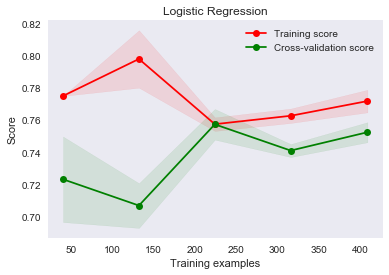

In [393]:
plot_learning_curve(estimator, "Logistic Regression", x_train, y_train)

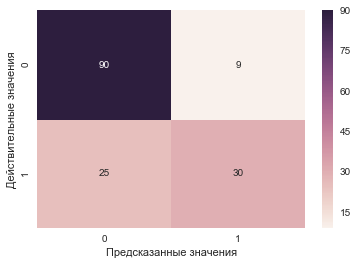

In [394]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [395]:
from sklearn import metrics

In [396]:
metrics.confusion_matrix(y_test, y_pred)

array([[90,  9],
       [25, 30]])

In [397]:
metrics.accuracy_score(y_test, y_pred)

0.77922077922077926

In [398]:
y_pred = [int(x) for x in y_pred]
y_pred1 = [int(x) for x in y_pred1]

In [399]:
y_test = [int(x) for x in y_test]

In [400]:
metrics.precision_score(y_test, y_pred)

0.76923076923076927

In [401]:
metrics.recall_score(y_test, y_pred)

0.54545454545454541

In [402]:

pima2 =pd.DataFrame(pima,columns=['accuracy','precision','recall','f1 metric','score','time (sec)'],
             index=['LR','SVC','KNC','DTC'])

In [403]:
pima2

,accuracy,precision,recall,f1 metric,score,time (sec)
LR,NaN,NaN,NaN,NaN,NaN,NaN
SVC,NaN,NaN,NaN,NaN,NaN,NaN
KNC,NaN,NaN,NaN,NaN,NaN,NaN
DTC,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
print_metrics(y_test, y_pred,pima2,t,"LR")

[[90  9]
 [25 30]]
accuracy =  0.779220779221
precision =  0.769230769231
recall =  0.545454545455
f1 = 0.63829787234
score = 100.0
time = 0.002992868423461914 sec
     accuracy  precision    recall  f1 metric  score  time (sec)
LR   0.779221   0.769231  0.545455   0.638298  100.0    0.002993
SVC       NaN        NaN       NaN        NaN    NaN         NaN
KNC       NaN        NaN       NaN        NaN    NaN         NaN
DTC       NaN        NaN       NaN        NaN    NaN         NaN


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

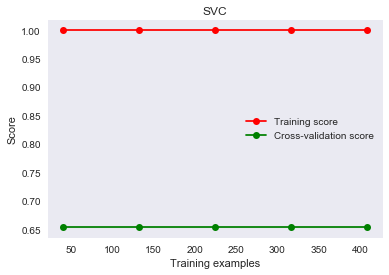

In [405]:
plot_learning_curve(estimator1, "SVC", x_train, y_train)

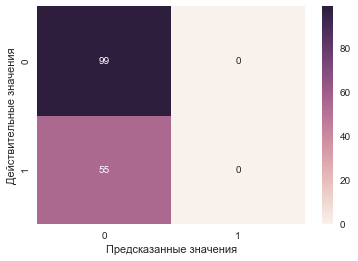

In [406]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred1)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [407]:
metrics.accuracy_score(y_test, y_pred1)

0.6428571428571429

In [408]:
metrics.precision_score(y_test, y_pred1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [409]:
metrics.recall_score(y_test, y_pred1)

0.0

In [410]:
print_metrics(y_test, y_pred1,pima2,t,"SVC")

[[99  0]
 [55  0]]
accuracy =  0.642857142857
precision =  0.0
recall =  0.0
f1 = nan
score = 100.0
time = 0.002992868423461914 sec
     accuracy  precision    recall  f1 metric  score  time (sec)
LR   0.779221   0.769231  0.545455   0.638298  100.0    0.002993
SVC  0.642857   0.000000  0.000000        NaN  100.0    0.002993
KNC       NaN        NaN       NaN        NaN    NaN         NaN
DTC       NaN        NaN       NaN        NaN    NaN         NaN


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


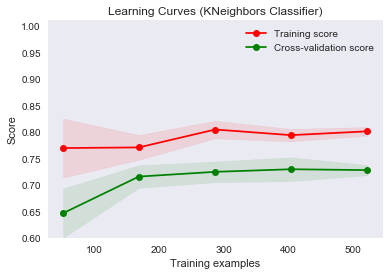

In [411]:
cls = KNeighborsClassifier()
start_time = time.time()
cls.fit(x_train, y_train)
t = (time.time() - start_time)
y_pred = cls.predict(x_test)
title = "Learning Curves (KNeighbors Classifier)"
cv = ShuffleSplit(n_splits=5, test_size=0.32, random_state=0)
estimator = cls
plot_learning_curve(estimator, title, X, Y, (0.6, 1.01), cv=cv, n_jobs=4)
plt.show()


In [412]:
y_pred = [int(x) for x in y_pred]

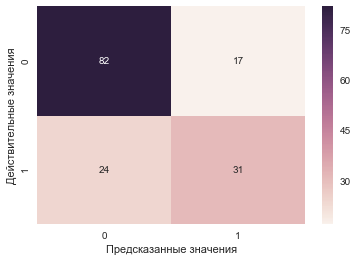

In [413]:
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [414]:
print_metrics(y_test, y_pred,pima2,t,'KNC')

[[82 17]
 [24 31]]
accuracy =  0.733766233766
precision =  0.645833333333
recall =  0.563636363636
f1 = 0.601941747573
score = 80.62
time = 0.0019941329956054688 sec
     accuracy  precision    recall  f1 metric   score  time (sec)
LR   0.779221   0.769231  0.545455   0.638298  100.00    0.002993
SVC  0.642857   0.000000  0.000000        NaN  100.00    0.002993
KNC  0.733766   0.645833  0.563636   0.601942   80.62    0.001994
DTC       NaN        NaN       NaN        NaN     NaN         NaN


In [415]:
cls = tree.DecisionTreeClassifier()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)
estimator3 = cls

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

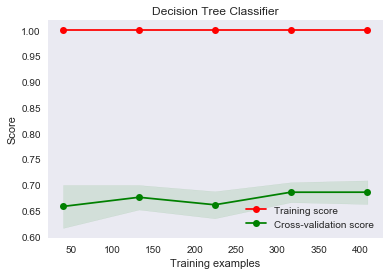

In [416]:
plot_learning_curve(estimator3, "Decision Tree Classifier", x_train, y_train)

In [417]:
y_pred = [int(x) for x in y_pred]

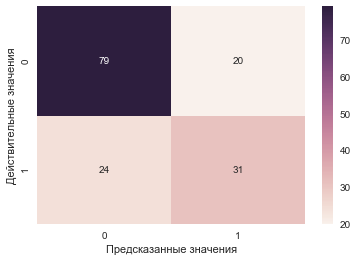

In [418]:
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [419]:
print_metrics(y_test, y_pred,pima2,t,'DTC')

[[79 20]
 [24 31]]
accuracy =  0.714285714286
precision =  0.607843137255
recall =  0.563636363636
f1 = 0.584905660377
score = 100.0
time = 0.0019941329956054688 sec
     accuracy  precision    recall  f1 metric   score  time (sec)
LR   0.779221   0.769231  0.545455   0.638298  100.00    0.002993
SVC  0.642857   0.000000  0.000000        NaN  100.00    0.002993
KNC  0.733766   0.645833  0.563636   0.601942   80.62    0.001994
DTC  0.714286   0.607843  0.563636   0.584906  100.00    0.001994
